In [155]:
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
death = pd.read_csv("avg_deaths.csv")
death

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448
5,6,785
6,7,769
7,8,1020
8,9,739
9,10,751


In [157]:
import calendar

In [158]:
calendar.monthrange(2020,1)

(2, 31)

In [159]:
_,num_day =calendar.monthrange(2020,1)

In [160]:
num_day

31

In [161]:
death["num_days"] = 0
death["year"] = 2020
death

,Month,New_deaths,num_days,year
0,1,0,0,2020
1,2,0,0,2020
2,3,77,0,2020
3,4,1844,0,2020
4,5,1448,0,2020
5,6,785,0,2020
6,7,769,0,2020
7,8,1020,0,2020
8,9,739,0,2020
9,10,751,0,2020


In [162]:
death = death[['year','Month','num_days' ,'New_deaths']]
death

,year,Month,num_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


In [163]:

death.columns = ['Year','Month','Num_days' ,'New_deaths', ]
death

,Year,Month,Num_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


In [164]:
def days(year,month):
    _,num_days = calendar.monthrange(year,month)
    return num_days

In [165]:
death.iloc[0]

Year          2020
Month            1
Num_days         0
New_deaths       0
Name: 0, dtype: int64

In [166]:
days = death[["Year","Month"]].apply(lambda row:days(row["Year"],row["Month"]) ,axis=1)
days

0     31
1     29
2     31
3     30
4     31
5     30
6     31
7     31
8     30
9     31
10    30
11    31
dtype: int32

In [167]:
death.Num_days = days
death.loc[11,"Num_days"]//=2
death

,Year,Month,Num_days,New_deaths
0,2020,1,31,0
1,2020,2,29,0
2,2020,3,31,77
3,2020,4,30,1844
4,2020,5,31,1448
5,2020,6,30,785
6,2020,7,31,769
7,2020,8,31,1020
8,2020,9,30,739
9,2020,10,31,751


In [168]:
death["Monthly_deaths"] = death.Num_days.mul(death.New_deaths)

In [169]:
death.rename({"New_deaths":"Avg_deaths"}, axis=1, inplace=True)
death

,Year,Month,Num_days,Avg_deaths,Monthly_deaths
0,2020,1,31,0,0
1,2020,2,29,0,0
2,2020,3,31,77,2387
3,2020,4,30,1844,55320
4,2020,5,31,1448,44888
5,2020,6,30,785,23550
6,2020,7,31,769,23839
7,2020,8,31,1020,31620
8,2020,9,30,739,22170
9,2020,10,31,751,23281


In [170]:
death["Cum_deaths"] = death.Monthly_deaths.cumsum()
death

,Year,Month,Num_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


In [171]:
cum_cases = [death.loc[2,"Cum_deaths"],death.loc[5,"Cum_deaths"],death.loc[9,"Cum_deaths"],death.loc[11,"Cum_deaths"]
            ]

In [172]:
propotion = [round(i/cum_cases[-1],2) for i in cum_cases]
propotion

[0.01, 0.42, 0.76, 1.0]

In [173]:
propotion = []
for i in cum_cases:
    v = i/297510
    final = round(v,2)
    propotion.append(final)
propotion

[0.01, 0.42, 0.76, 1.0]

In [174]:
xmaxs = [0.5+ i*(0.8-0.5) for i in propotion]
xmaxs

[0.503, 0.626, 0.728, 0.8]

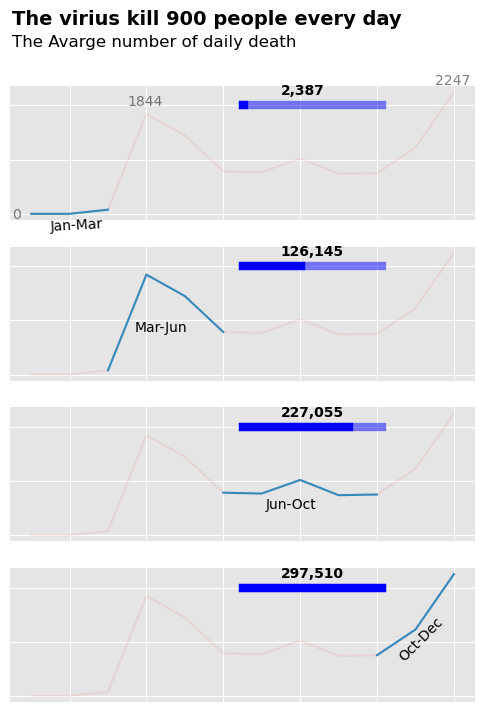

In [175]:
fig,(ax1,ax2,ax3,ax4 ) = plt.subplots(nrows = 4,ncols = 1,figsize=(6,8)) 
axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.plot(death["Month"],death["Avg_deaths"],alpha=0.1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(bottom =False,left=False)
    for spines in ax.spines:
        ax.spines[spines].set_visible(False)
ax1.plot(death["Month"][:3],death["Avg_deaths"][:3])
ax1.text(x=0.5,y=-80,s="0",alpha =0.5)
ax1.text(x=3.5,y= 2000,s="1844",alpha =0.5)
ax1.text(x=11.5,y= 2400,s="2247",alpha =0.5)
ax1.text(x=1.5,y= -300,s="Jan-Mar",rotation=3)
ax1.text(0.5,3500,"The virius kill 900 people every day",size=14, weight = "bold")
ax1.text(0.5,3100,"The Avarge number of daily death" ,size=12)

ax2.plot(death["Month"][2:6],death["Avg_deaths"][2:6])
ax2.text(x=3.7,y= 800,s="Mar-Jun")

ax3.plot(death["Month"][5:10],death["Avg_deaths"][5:10])
ax3.text(x=7.1,y= 500,s="Jun-Oct")

ax4.plot(death["Month"][9:],death["Avg_deaths"][9:])
ax4.text(x=10.5,y= 660,s="Oct-Dec",rotation=45)
for ax,deaths, xmax in zip(axes,cum_cases,xmaxs):
    ax.axhline(y=2000,xmin=0.5,xmax=0.8,c="blue",linewidth=6,alpha= 0.5)
    ax.axhline(y=2000,xmin=0.5,xmax=xmax,c="blue",linewidth=6)
    ax.text(x=7.5,y=2200,s=format(deaths,","),weight="bold")
plt.show()

# Wine Quality

In [176]:
url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"

In [177]:
import requests
import pandas as pd
responce =  requests.get(url,verify=False)

C:\Users\hp\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [178]:
with open("wine.zip","wb") as f:
    f.write(responce.content)

In [179]:
import zipfile
with zipfile.ZipFile("wine.zip") as Zipped:
    Zipped.extractall("wine")

In [180]:
red_wine = pd.read_csv("winequality-red.csv" ,sep = ";")
white_wine = pd.read_csv("winequality-white.csv",sep = ";")



In [181]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [182]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [183]:
red_corr = red_wine.corr()["quality"][:-1] # red_corr.drop["quality"]
white_corr  = white_wine.corr()["quality"][:-1]

In [184]:
red_corr

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

In [185]:
white_corr

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

# Category -->bar / Pi

In [186]:
import matplotlib.pyplot as plt
import matplotlib.style as style


In [187]:
print(style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [188]:
style.use("ggplot")

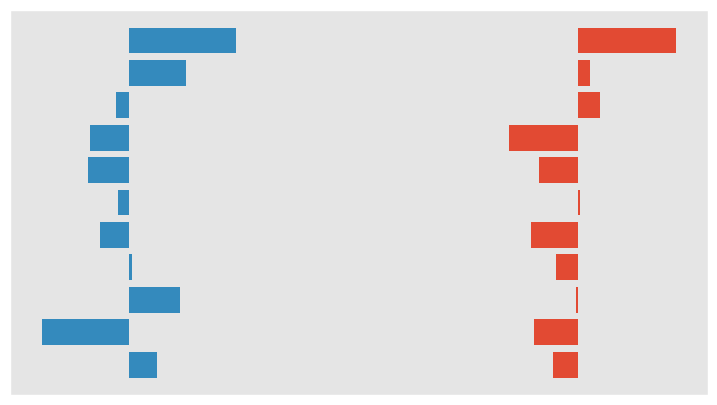

In [189]:
fig , ax = plt.subplots(figsize=(9,5))
ax.barh(white_corr.index,white_corr,label="white",left=2)
ax.barh(red_corr.index,red_corr.values,label="red")
ax.grid(visible = False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [195]:
import coords

In [196]:
dir(coords)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'x_coords',
 'y_coord']

In [198]:
xcoords = coords.x_coords
ycoords = coords.y_coord
print(xcoords)
print(ycoords)


{'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91, 'Density': 0.8, 'Total Sulfur Dioxide': 0.59, 'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77, 'Residual Sugar': 0.67, 'Citric Acid': 0.76, 'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
9.8


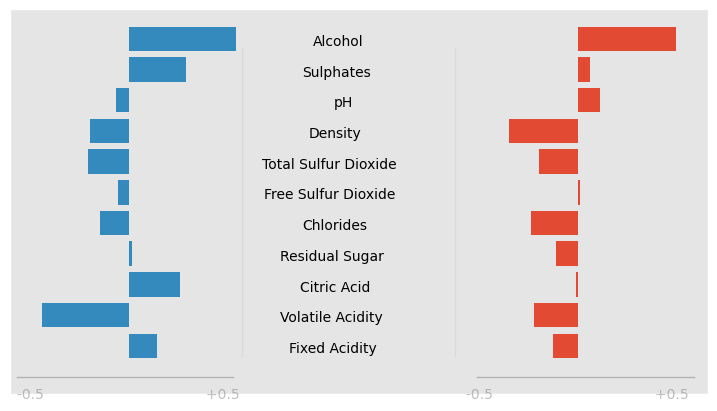

In [219]:
fig , ax = plt.subplots(figsize=(9,5))
ax.barh(white_corr.index,white_corr,label="white",left=2)
ax.barh(red_corr.index,red_corr.values,label="red")
ax.grid(visible = False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])

xcoords = coords.x_coords
ycoords = coords.y_coord
for label,x_cord in xcoords.items():
    ax.text(x=x_cord,y=ycoords,s=label)
    ycoords-=1

ax.axvline(0.5,c="grey",alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9)
ax.axvline(1.45,c="grey",alpha=0.1,linewidth=1,ymin=0.1,ymax=0.9)

ax.axhline(-1,xmin=0.01,xmax=0.32,c='grey',linewidth=1,alpha=0.5)
ax.axhline(-1,xmin=0.67,xmax=0.98,c='grey',linewidth=1,alpha=0.5)
ax.text(x=-0.5,y=-1.7,s="-0.5"+" "*37+"+0.5" ,c="grey",alpha=0.5)
ax.text(x=1.5,y=-1.7,s="-0.5"+" "*37+"+0.5" ,c="grey",alpha=0.5)

plt.show()